# 3.3 MOO for 2D vector fields

In [1]:
import numpy as np
from cyclops.object_reader import PickleManager
from cyclops.plotting import PlotManager

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = PlotManager()
true_temp_field = pickle_manager.read_file("results/disp_line_field.pickle")
grid = pickle_manager.read_file("results/disp_line_points.pickle")

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds + np.array([[1], [-1]]) * 0.002

In [2]:
from cyclops.fields import VectorField
from cyclops.regressors import RBFModel
from cyclops.sensor_suite import SensorSuite
from cyclops.sensors import RoundSensor


# Setup the sensor suite
def f(x):
    return np.zeros(x.shape)


sensor = RoundSensor(
    0, f, 0.1, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), 0.001, 1
)
sensors = np.array([sensor] * 5)

sensor_suite = SensorSuite(VectorField(RBFModel, field_bounds), sensors)

In [3]:
# Setup the experiment
from cyclops.experiment import Experiment
from cyclops.optimisers import NSGA2Optimiser


optimiser = NSGA2Optimiser("00:00:10")
experiment = Experiment(true_temp_field, grid, optimiser)
experiment.plan_moo(sensor_suite, sensor_bounds, repetitions=10, loss_limit=100)
res = experiment.design()

# Display and save the results
for i, setup in enumerate(res.X):
    pickle_manager.save_file(
        f"results/temp_1D_{str(i)}.pickle", setup.reshape(-1, true_temp_field.get_dim())
    )

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      1 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |             f
     3 |       60 |      1 |  0.000000E+00 |             f
     4 |       70 |      1 |  0.000000E+00 |             f
     5 |       80 |      1 |  0.000000E+00 |             f
     6 |       90 |      1 |  0.000000E+00 |             f
     7 |      100 |      1 |  0.000000E+00 |             f
     8 |      110 |      1 |  0.000000E+00 |             f
     9 |      120 |      1 |  0.000000E+00 |             f
    10 |      130 |      1 |  0.000000E+00 |             f
    11 |      140 |      1 |  3.773212E-13 |             f
    12 |      150 |      1 |  3.773212E-13 |             f
    13 |      160 |      1 |  3.773212E-13 |             f
    14 |      170 |      1 |  5.085617E-13 |             f
    15 |      180 |      1 |  5.665467E-13 |             f
    16 |      190 |      1 |  1.169294E-12 |            

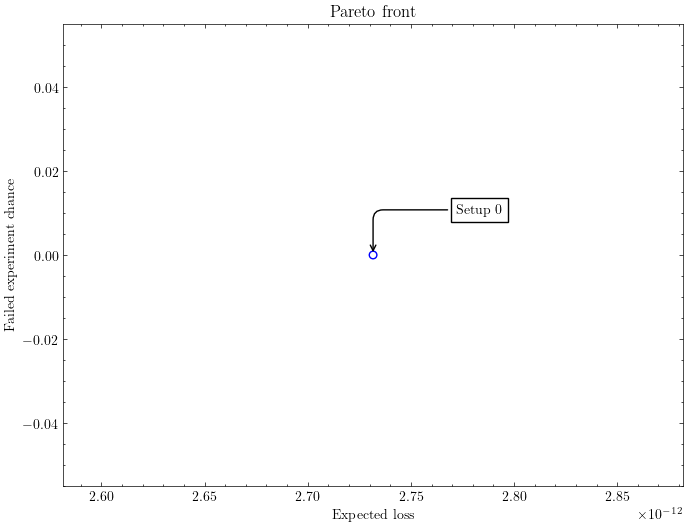

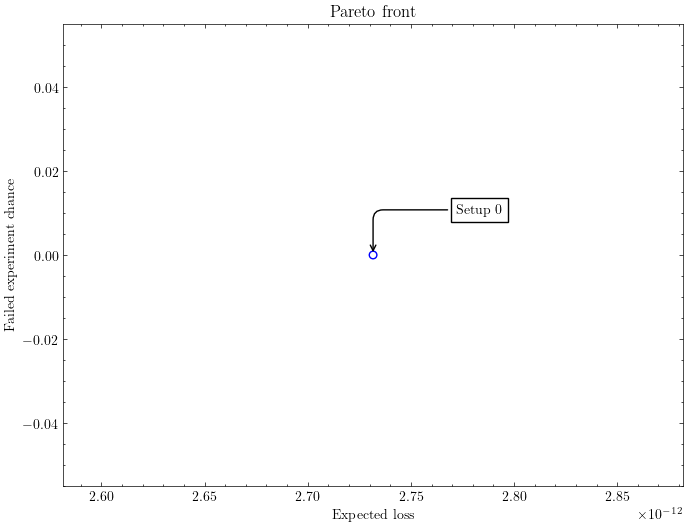

In [4]:
graph_manager.build_pareto(res.F)
graph_manager.draw()

graph_manager.build_pareto(res.F)

display_str = input("Enter setup to display [Q to quit]: ")
while display_str.isnumeric():
    (
        proposed_layout,
        true_disps,
        model_disps,
        sensor_vals,
    ) = experiment.get_SOO_plotting_arrays(res.X[int(display_str)])
    print("\nLoss:", experiment.calc_moo_loss(res.X[int(display_str)]))
    mag_true_disps = np.linalg.norm(true_disps, axis=1).reshape(-1, 1)
    mag_model_disps = np.linalg.norm(model_disps, axis=1).reshape(-1, 1)
    mag_sensor_vals = np.linalg.norm(sensor_vals, axis=1).reshape(-1, 1)

    graph_manager.build_1D_compare(
        grid,
        proposed_layout,
        mag_sensor_vals,
        mag_true_disps,
        mag_model_disps,
    )
    graph_manager.draw()
    display_str = input("Enter setup to display [Q to quit]: ")